# Prevención de ACVs

Un accidente cerebrovascular (ACV), a veces llamado ataque cerebral, ocurre cuando algo bloquea el suministro de sangre a una parte del cerebro o cuando un vaso sanguíneo en el cerebro estalla. En cualquier caso, partes del cerebro se dañan o mueren. Un derrame cerebral puede causar daño cerebral duradero, discapacidad a largo plazo o incluso la muerte.

En la Argentina:

    Se produce un accidente cerebrovascular (ACV) cada nueve minutos. 
    
    126 mil casos de ACV por año, de los cuales 18 mil terminan en muerte.

En Estados Unidos :
    
    Alguien sufre un acv cada 40 segundos. 
    
    Cada 4 minutos, una persona muere de un acv.
    
    Los costos relacionados con el accidente cerebrovascular ascendieron a casi $ 46 mil millones entre 2014 y 2015.Este total incluye el costo de los servicios de atención médica, los medicamentos para tratar el accidente cerebrovascular y los días de trabajo perdidos.

Según la OMS, el 80% de los ACVs son prevenibles.

El objetivo de este trabajo es construir un modelo de predicción para predecir el accidente cerebrovascular y evaluar la precisión del modelo. Exploraremos cinco modelos diferentes para ver cuál produce resultados confiables y repetibles. Los modelos son: Árbol de decisión, Random Forest, SVM, Logistic Regression y KNN. A partir del resultado de la predicción de los modelos, el modelo de mejor rendimiento se someterá al proceso de validación cruzada para evaluar su repetibilidad.

Buscamos que el modelo genere un valor agregado para médicos, clínicas, aseguradoras y a empresas(en examenes preocupacionales y periódicos) ahorrandoles gastos a futuro.

Respecto a métricas, consideraremos la más importante al Recall dado que buscaremos tener la menor cantidad de predicción de
falsos negativos posible por una cuestión de ética, seguida de Precisión, que es la medida que generará valor a nuestro modelo.

El dataset utilizado fue descargado de la página Kaggle. La persona que lo subió mantuvo su fuente anónima. 

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, classification_report, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [203]:
acv=pd.read_csv("C:/Users/HP/Downloads/healthcare-dataset-stroke-data.csv", delimiter=",")
acv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [204]:
print(set(acv.gender), 
      set(acv.ever_married), 
      set(acv.work_type), 
      set(acv.Residence_type), 
      set(acv.smoking_status))

{'Other', 'Male', 'Female'} {'Yes', 'No'} {'Never_worked', 'Private', 'Govt_job', 'children', 'Self-employed'} {'Urban', 'Rural'} {'Unknown', 'formerly smoked', 'smokes', 'never smoked'}


In [205]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [206]:
acv.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Descripción de las variables:

id: Número de identificación del individuo. Int

gender: Género de individuo. Str

hypertension: Informa si el paciente tiene hipertensión o no. Int(1,0)

heart_disease: Informa si el paciente tiene problemas cardíacos o no. Int(1,0)

ever_married: Informa si el paciente esta casado o no. Str (Yes, No)

work_type: Distintas categorías de trabajo. Str (children, Govt_job, Never_worked, Private, Selfemployed)

Residence_type: Tipo de residencia del individuo. Str (Urban, Rural)

avg_glucose_level: Promedio de glucosa en sangre del individuo. Float

bmi: Índice de masa corporal. Float

smoking_status: Estatus de fumador del individuo. Str (formerly smoked,never smoked,smokes, unknown)

stroke: Variable target. Sufrió o no un acv el paciente

<AxesSubplot:>

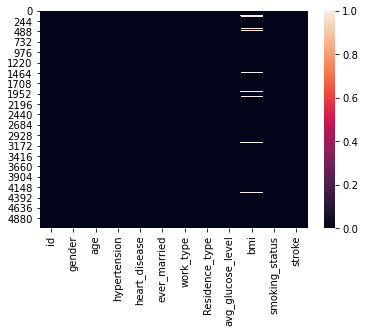

In [207]:
sns.heatmap(acv.isnull())

In [208]:
a = (acv.isnull().sum())
print(a[a>0])
acv.shape

bmi    201
dtype: int64


(5110, 12)

In [209]:
strokes=acv[acv.stroke == 1]
nostrokes=acv[acv.stroke == 0]

In [210]:
acv[acv['bmi'].isnull() & acv.stroke == 1]=acv[acv['bmi'].isnull() & acv.stroke == 1].fillna(np.mean(strokes.bmi))
acv[acv['bmi'].isnull() & acv.stroke == 0]=acv[acv['bmi'].isnull() & acv.stroke == 0].fillna(np.mean(nostrokes.bmi))


Reemplazamos el bmi por el promedio acorde a si sufrio un acv o no.

La columna de id no aporta información.

In [211]:
acv = acv.drop("id", 1)

In [212]:
acv.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Se trata de un solo valor. Lo eliminamos

In [213]:
acv = acv[acv.gender != 'Other']

In [214]:
acv.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

Los Unknown representan casi un 30% del dataset. Los consideraremos como una cuarta categoria

In [215]:
acv["smoking_status"].replace({"Unknown": "not known"}, inplace=True)

In [216]:
categoricas={"gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"}
continuas={"age", "avg_glucose_level", "bmi"}

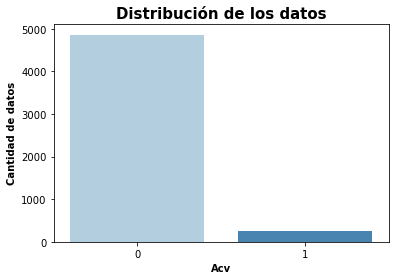

In [217]:
sns.countplot(x=acv.stroke, palette='Blues')
plt.xlabel('Acv', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de datos', fontsize=10, fontweight='bold')
plt.title('Distribución de los datos', fontweight = 'bold', fontsize='15')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.show()  

Estamos ante un problema de clasificación con informacion altamente desbalanceada respecto a la variable target.

In [218]:
strokes=acv[acv.stroke == 1]

<AxesSubplot:xlabel='age', ylabel='Density'>

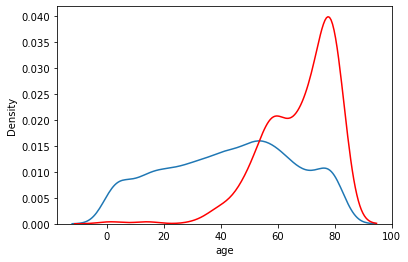

In [220]:
from seaborn import distplot
distplot(acv.age, hist=False)
distplot(strokes.age, hist=False, color= "Red", label="Stroke")

Podemos notar que a mayor es la edad, aumenta considerablemente la cantidad de ACVs.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

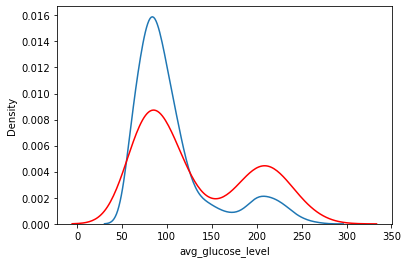

In [221]:
from seaborn import distplot
distplot(acv.avg_glucose_level, hist=False)
distplot(strokes.avg_glucose_level, hist=False, color= "Red")

La forma de las  distribuciones son similares entre los casos de ACV y la poblacion respecto a la glucosa promedio. Vemos que hay mas casos de acvs que la poblacion cuando se ronda los 200, pero la gran mayoria se encuentra rondando los 75, que tambien son los valores más repetidos de la población.

<AxesSubplot:xlabel='bmi', ylabel='Density'>

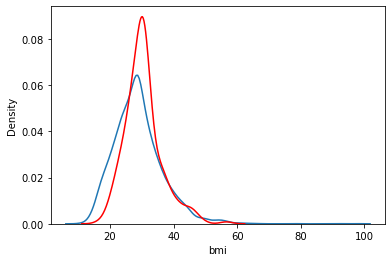

In [222]:
from seaborn import distplot
distplot(acv.bmi, hist=False)
distplot(strokes.bmi, hist=False, color= "Red")

El bmi de la población y el de los casos de ACV siguen distribuciones similares en forma. Vemos que la gran mayoría de los casos de ACV se producen rondando los 30, aunque tambien es el valor que más se repite en la población.

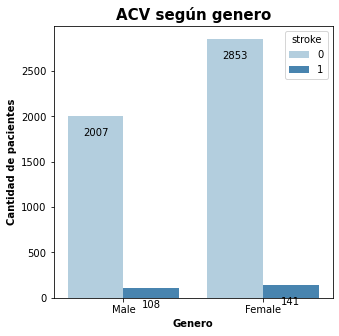

In [223]:
fig5, ax=plt.subplots(figsize=(5,5)) 
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.gender,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Genero', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de pacientes', fontsize=10, fontweight='bold')
plt.title('ACV según genero', fontweight = 'bold', fontsize='15')
plt.show()  

De los hombres (41% del data set) el 5% sufrieron un acv.

De las mujeres (59% del data set) el 4% sufrieron un acv

No hay mucha diferencia respecto al género y la posibilidad de sufrir un acv

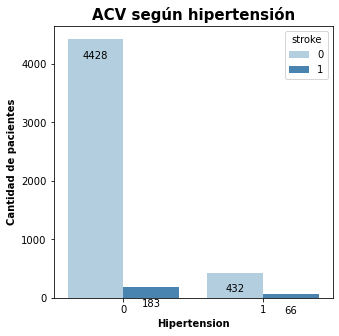

In [224]:
fig5, ax=plt.subplots(figsize=(5,5)) 
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.hypertension,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Hipertension', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de pacientes', fontsize=10, fontweight='bold')
plt.title('ACV según hipertensión', fontweight = 'bold', fontsize='15')
plt.show()  

De los casos de hipertensión (10% del data set) el 14% sufrieron un acv.

De los casos de no hipertensión (90% del data set) el 4% sufrieron un acv.

Tener hipertensión estaría aumentando en la posibilidad de tener un acv frente a no tenerla.

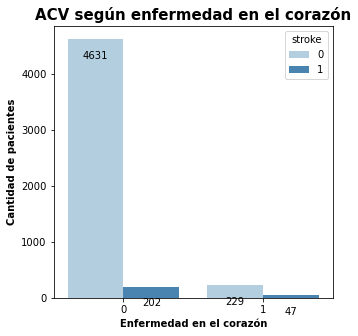

In [225]:
fig5, ax=plt.subplots(figsize=(5,5)) 
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.heart_disease,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Enfermedad en el corazón', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de pacientes', fontsize=10, fontweight='bold')
plt.title('ACV según enfermedad en el corazón', fontweight = 'bold', fontsize='15')
plt.show()  

De los casos de enfermedad de corazón (5% del data set) el 17% sufrieron un acv.

De los casos de no enfermedad de corazón (95% del data set) el 4% sufrieron un acv.

Haber tenido una enfermedad en el corazón estaría aumentando en la posibilidad de tener un acv frente a no tenerla.

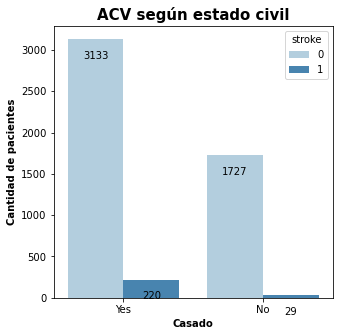

In [226]:
fig5, ax=plt.subplots(figsize=(5,5)) 
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.ever_married,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Casado', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de pacientes', fontsize=10, fontweight='bold')
plt.title('ACV según estado civil', fontweight = 'bold', fontsize='15')
plt.show()  

De los solteros (34% del data set) el 2% sufrieron un acv.

De los casados (66% del data set) el 6% sufrieron un acv.

Estar casado estaría aumentando en la posibilidad de tener un acv frente a estar soltero.

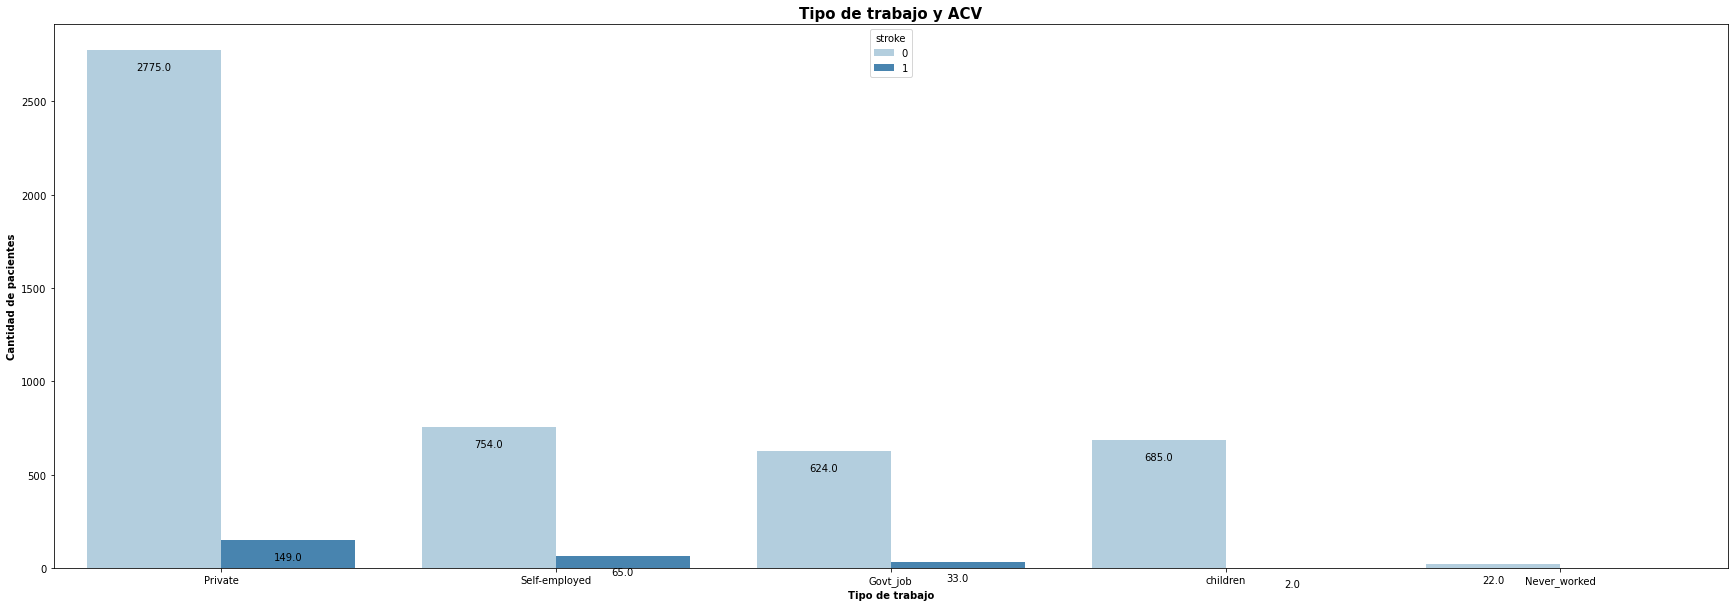

In [227]:
fig5, ax=plt.subplots(figsize=(30,10)) 
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.work_type,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Tipo de trabajo', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de pacientes', fontsize=10, fontweight='bold')
plt.title('Tipo de trabajo y ACV', fontweight = 'bold', fontsize='15')
plt.show()  

La gente que trabaja en el sector privado (54% del data set) el 5% sufrieron un acv.

La gente que trabaja independientemente (15% del data set) el 8% sufrieron un acv

La gente que trabaja en el gobierno (12% del data set) el 5% sufrieron un acv.

La gente que tiene hijos (13% del data set) menos del 1% sufrieron un acv.

La gente que no trabajo nunca (menos del 1% del data set) nunca sufrieron un acv.

Trabajar independientemente sería la profesión más riesgosa de sufrir un acv frente al resto.

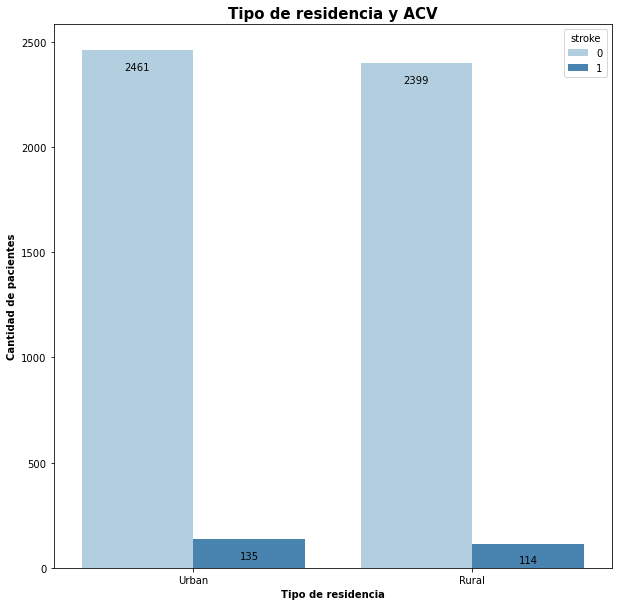

In [228]:
fig5, ax=plt.subplots(figsize=(10,10)) 
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.Residence_type,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Tipo de residencia', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de pacientes', fontsize=10, fontweight='bold')
plt.title('Tipo de residencia y ACV', fontweight = 'bold', fontsize='15')
plt.show()  

La gente que vive en la ciudad (51% del data set) el 5% sufrieron un acv.

La gente que vive en el campo (49% del data set) el 4% sufrieron un acv

No hay mucha diferencia respecto al tipo de residencia y la posibilidad de sufrir un acv

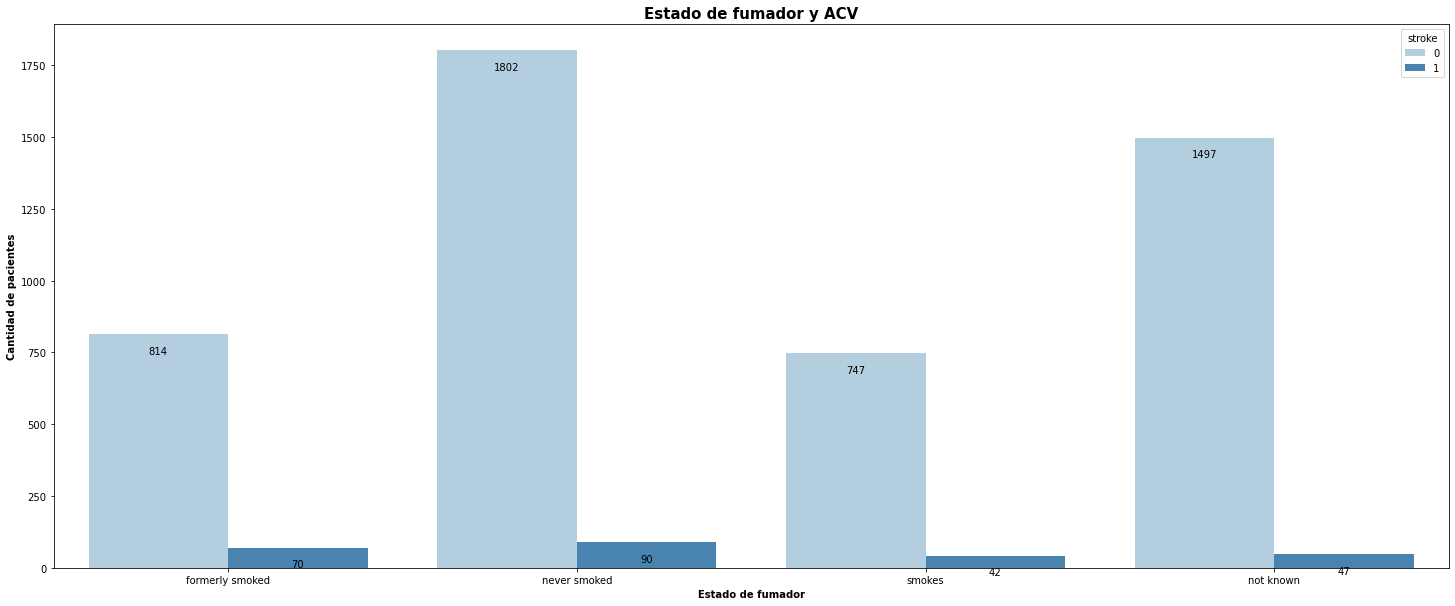

In [229]:
fig5, ax=plt.subplots(figsize=(25,10)) 
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.smoking_status,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Estado de fumador', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de pacientes', fontsize=10, fontweight='bold')
plt.title('Estado de fumador y ACV', fontweight = 'bold', fontsize='15')
plt.show()  

La gente que solía fumar (17% del data set) el 8% sufrieron un acv.

La gente que nunca fumó (37% del data set) el 5% sufrieron un acv

La gente que fuma (15% del data set) el 5% sufrieron un acv.

La gente que no se sabe su estatus de fumador (30% del data set) el 3% sufrieron un acv.

Parecería no haber una influencia del estatus de fumador con respecto a la posibilidad de tener un acv.

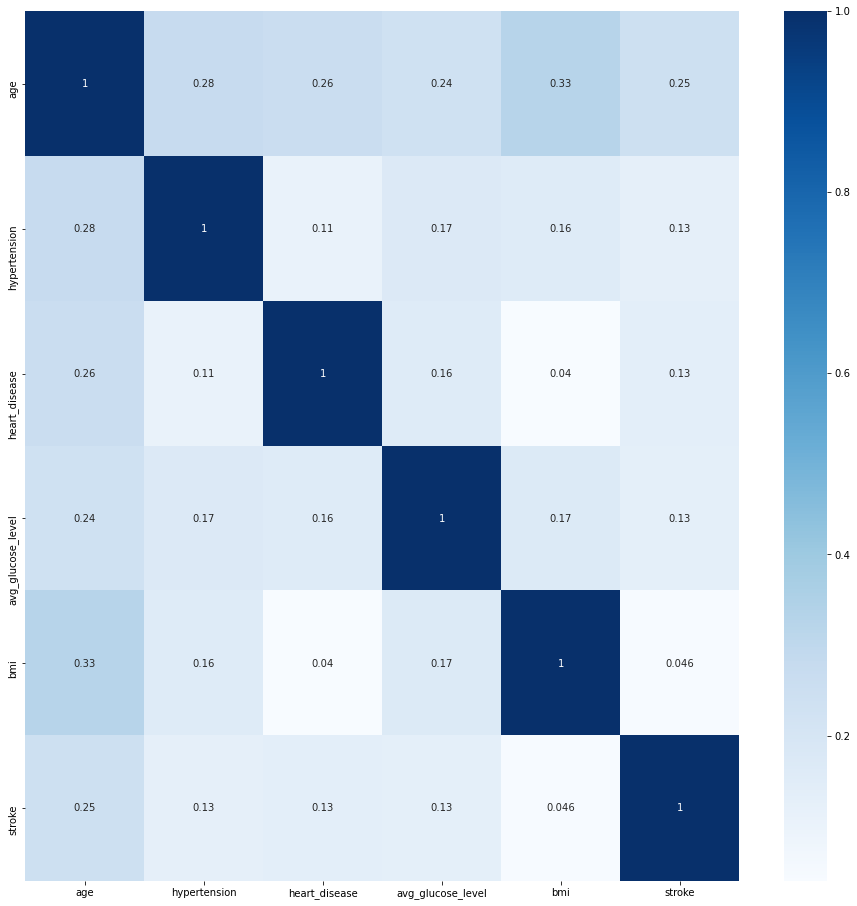

In [230]:
corrmat = acv.corr() 
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
g=sns.heatmap(acv[top_corr_features].corr(),annot=True,cmap="Blues")
plt.show()

La edad y bmi son las variables con mayor correlación. La variable que más se relaciona con la posibilidad de tener un acv es la edad.

Procedemos a estandarizas las variables numericas y encodear las variables categoricas

In [231]:
one_hot = pd.get_dummies(acv["work_type"])
acv = acv.join(one_hot)

In [232]:
acv = acv.drop('work_type', 1)

In [233]:
one_hot = pd.get_dummies(acv["smoking_status"])
acv = acv.join(one_hot)

In [234]:
acv = acv.drop("smoking_status", 1)

In [235]:
acv['gender']=acv['gender'].apply(lambda x : 1 if x=='Male' else 0)
acv["Residence_type"] = acv["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
acv["ever_married"] = acv["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

In [236]:
s = StandardScaler()
acv[['age', 'avg_glucose_level','bmi']] = s.fit_transform(acv[['age', 'avg_glucose_level','bmi']])
acv["bmi"] = pd.to_numeric(acv["bmi"])
acv["bmi"] = acv["bmi"].apply(lambda x: 50 if x>50 else x)

A fines medicos, un bmi mayor a 40 ya vuelve a un individuo como paciente de extremo riesgo (obesidad clase III). Es lo mismo que tenga 60,70,80.. etc. A los mayores de 50 los fijamos en 50.

In [237]:
acvd= pd.get_dummies(acv, drop_first=True)

In [238]:
X1= acvd.drop(["stroke"], axis=1)
X = acvd.drop(["stroke"], axis=1).to_numpy()
y = acvd.stroke.values

In [239]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler()
X, y = rs.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             stratify = y)

Utilizo RandomOverSampler para seleccionar ejemplos de la muestra minoritaria del target y agregarlos al set de entrenamiento. Tambien aplico StratifiedKFold y SMOTE al tratarse de un dataset desbalanceado

In [240]:
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
train, test = list(skf.split(X, y))[0]
X_train = X[train]
X_test = X[test]
y_train = y[train]
y_test= y[test]
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Arbol de decision

In [241]:
tree = DecisionTreeClassifier()

In [242]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [243]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [244]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
confusion_matrix= confusion_matrix(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de evaluacion:", test_recall)
print(confusion_matrix)


% de aciertos sobre el set de entrenamiento: 1.0
% de precision sobre el set de entrenamiento: 1.0
% de recall sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.9717078189300411
% de precision sobre el set de evaluacion: 0.9464459591041869
% de recall sobre el set de evaluacion: 1.0
[[917  55]
 [  0 972]]


AttributeError: 'numpy.ndarray' object has no attribute 'label'

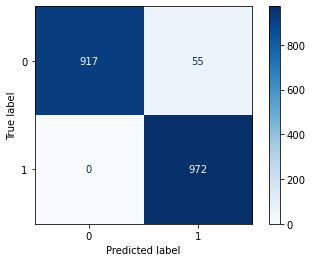

In [257]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test, y_test, cmap="Blues")  
confusion_matrix.label.set_color("white")
plt.show()

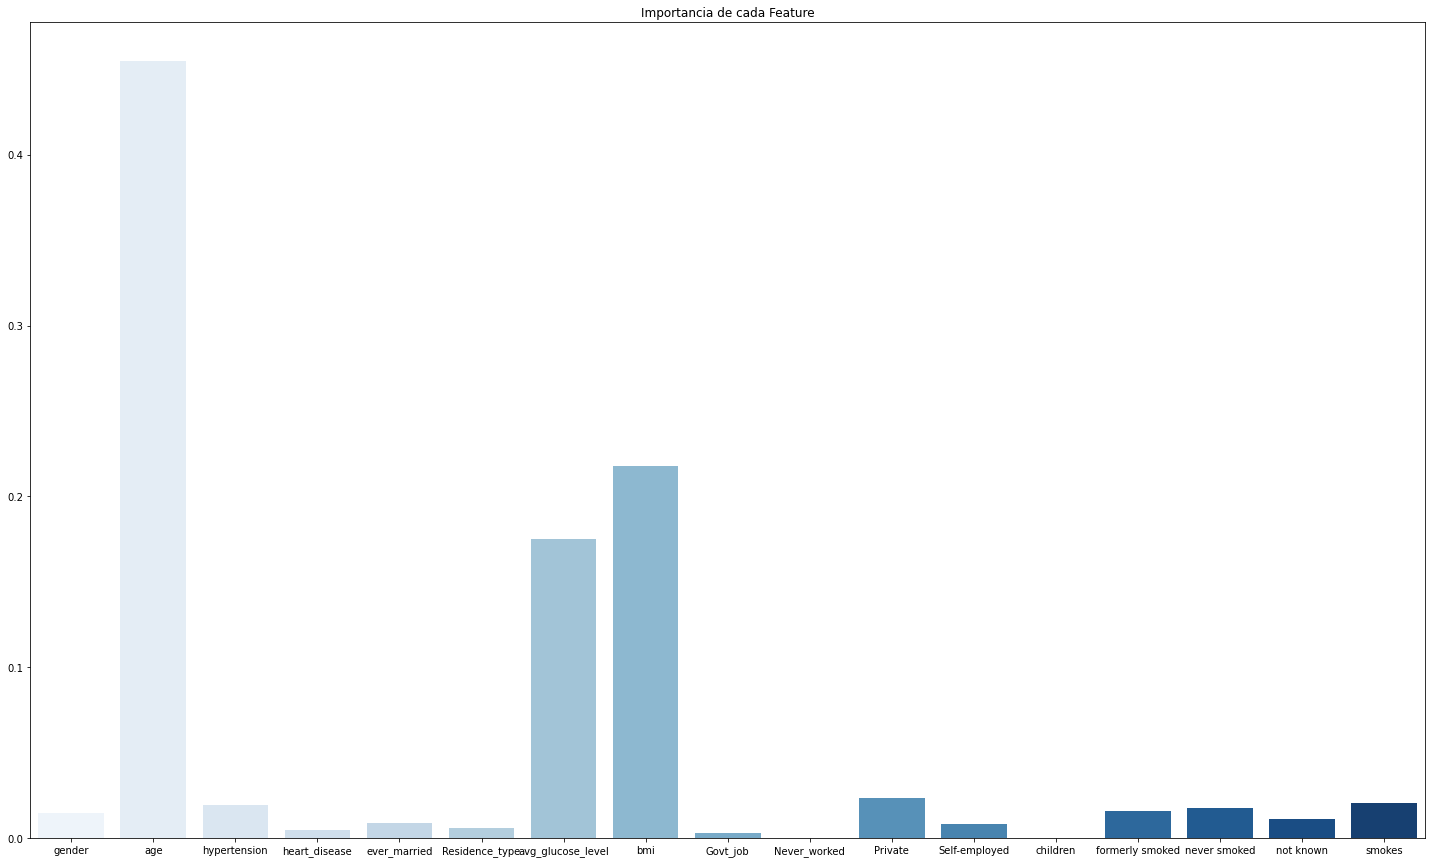

In [246]:
import matplotlib.pyplot as plt #La edad es la variable mas importante
import seaborn as sns

plt.figure(figsize=(25,15))
importances = tree.feature_importances_
columns = X1.columns
sns.barplot(columns, importances, palette="Blues")
plt.title('Importancia de cada Feature')
plt.show()

# Random Forest

Este fue el algorítmo con mejor performance respecto a recall y a precisión.

In [247]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()  

In [248]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [249]:
y_train_pred= model.predict(X_train)

In [250]:
y_test_pred = model.predict(X_test) 

In [251]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
confusion_matrix= confusion_matrix(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de evaluacion:", test_recall)

% de aciertos sobre el set de entrenamiento: 1.0
% de precision sobre el set de entrenamiento: 1.0
% de recall sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.9948559670781894
% de precision sobre el set de evaluacion: 0.9898167006109979
% de recall sobre el set de evaluacion: 1.0


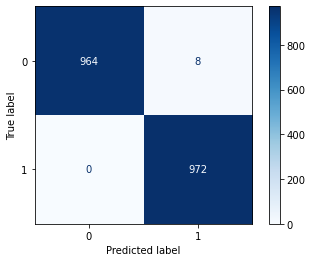

In [174]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues")  
plt.show()

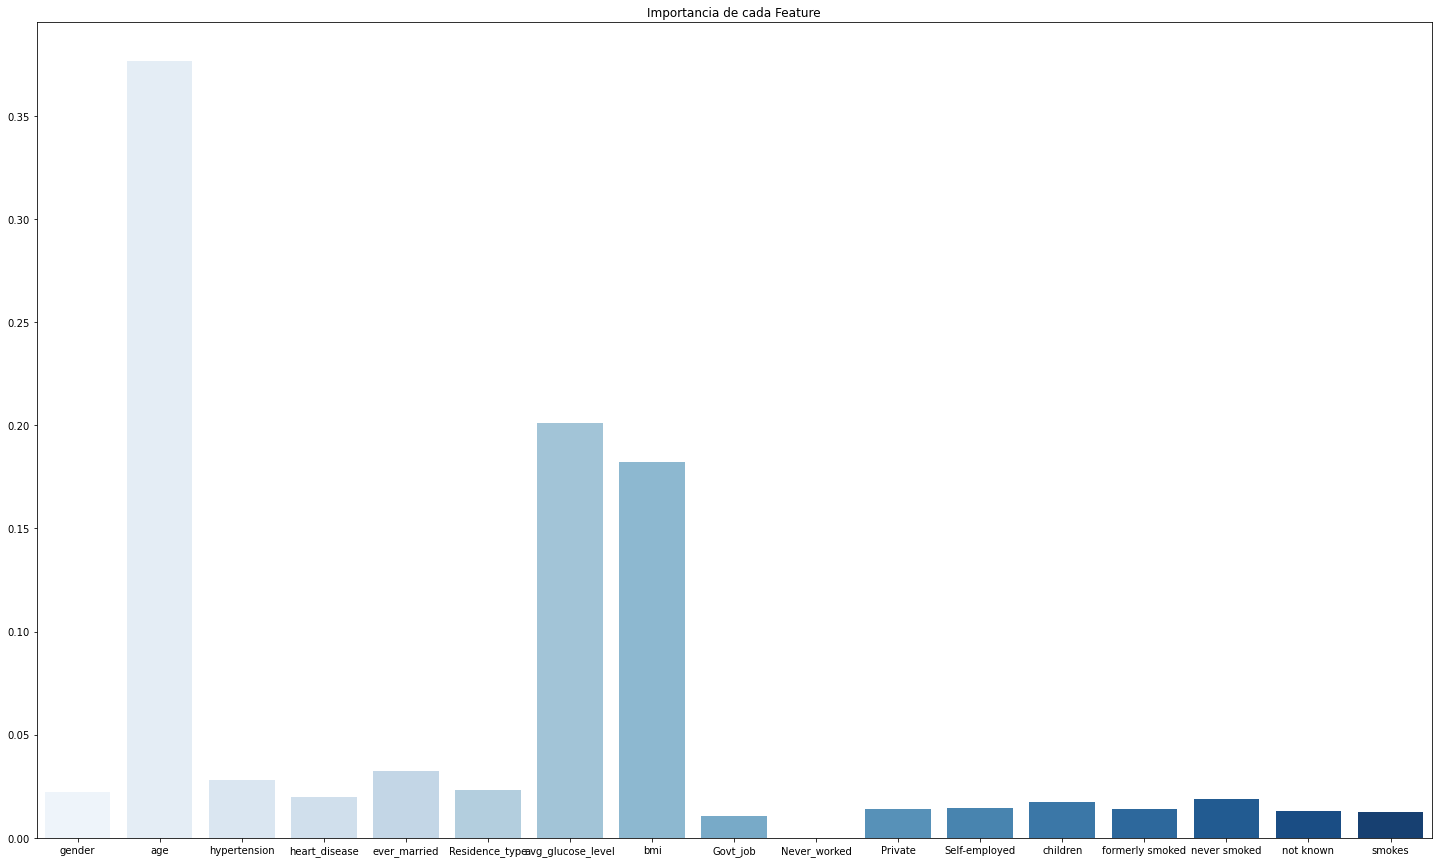

In [141]:
import matplotlib.pyplot as plt #La edad es la variable mas importante
import seaborn as sns

plt.figure(figsize=(25,15))
importances = model.feature_importances_
columns = X1.columns
sns.barplot(columns, importances, palette="Blues")
plt.title('Importancia de cada Feature')
plt.show()

Vemos que las variables de mayor importancia fueron la edad, el nivel de glucosa y el bmi. 

In [269]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='recall')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [270]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 1.0000


# KNN

In [175]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [177]:
y_train_pred = knn.predict(X_train)

In [178]:
y_test_pred = knn.predict(X_test)

In [179]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
confusion_matrix= confusion_matrix(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de evaluacion:", test_recall)

% de aciertos sobre el set de entrenamiento: 0.9515174897119342
% de precision sobre el set de entrenamiento: 0.9116060961313013
% de recall sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.9377572016460906
% de precision sobre el set de evaluacion: 0.889295516925892
% de recall sobre el set de evaluacion: 1.0


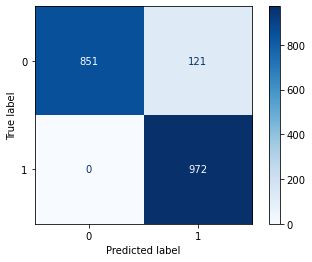

In [180]:
plot_confusion_matrix(knn, X_test, y_test, cmap="Blues")  
plt.show()

# Regresión Logística

In [187]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [188]:
regresion_logistica = LogisticRegression()
regresion_logistica.fit(X_train,y_train)

LogisticRegression()

In [189]:
y_train_pred = regresion_logistica.predict(X_train)

In [191]:
y_test_pred = regresion_logistica.predict(X_test)

In [192]:
from sklearn.metrics import accuracy_score#El modelo funciona de forma similar en el test de entrenamiento como en el de evaluacion. Los resultados son muy buenos
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
confusion_matrix= confusion_matrix(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de evaluacion:", test_recall)

% de aciertos sobre el set de entrenamiento: 0.7799639917695473
% de precision sobre el set de entrenamiento: 0.7562985636920179
% de recall sobre el set de entrenamiento: 0.8261316872427984
% de aciertos sobre el set de evaluación: 0.7849794238683128
% de precision sobre el set de evaluacion: 0.7638095238095238
% de recall sobre el set de evaluacion: 0.8251028806584362


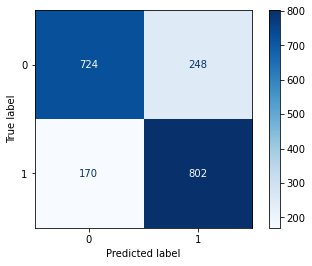

In [193]:
plot_confusion_matrix(regresion_logistica, X_test, y_test, cmap="Blues")  
plt.show()

# SVM

In [194]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [196]:
modelo = SVC()
modelo.fit(X_train, y_train)

SVC()

In [197]:
y_train_pred= modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [198]:
from sklearn.metrics import accuracy_score#El modelo funciona de forma similar en el test de entrenamiento como en el de evaluacion. Los resultados son muy buenos
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision= precision_score(y_train, y_train_pred)
test_precision= precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
confusion_matrix= confusion_matrix(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print("% de precision sobre el set de entrenamiento:", train_precision)
print("% de recall sobre el set de entrenamiento:", train_recall)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print("% de precision sobre el set de evaluacion:", test_precision)
print("% de recall sobre el set de evaluacion:", test_recall)

% de aciertos sobre el set de entrenamiento: 0.856224279835391
% de precision sobre el set de entrenamiento: 0.8120775123929698
% de recall sobre el set de entrenamiento: 0.926954732510288
% de aciertos sobre el set de evaluación: 0.8477366255144033
% de precision sobre el set de evaluacion: 0.8017857142857143
% de recall sobre el set de evaluacion: 0.9238683127572016


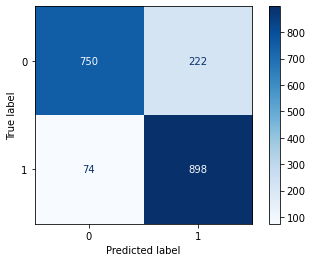

In [200]:
plot_confusion_matrix(modelo, X_test, y_test, cmap="Blues")  
plt.show()